In [149]:
#Importing dependencies 
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import numpy as np
from datetime import datetime, date, time

In [150]:
#reading in files
filepath = os.path.join(".", "Resources", "Crash_Data.csv")
df = pd.read_csv(filepath, low_memory=False)
pop_filepath = os.path.join(".", "Resources", "Population data.xlsx")
df_pop = pd.read_excel(pop_filepath, sheet_name = "Data1")

## Analysing Data

### Crash dataset

In [151]:
df

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,NaN,No,...,5,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
52839,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,19,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52840,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52841,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day


In [152]:
df.shape


(52843, 23)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

Duplicate Crash IDs indicate more than 1 person was killed in that particular crash. 

In [154]:
df["Crash ID"].nunique()

47567

In [155]:
duplicate = df[df.duplicated(["Crash ID"])]
len(duplicate)

5276

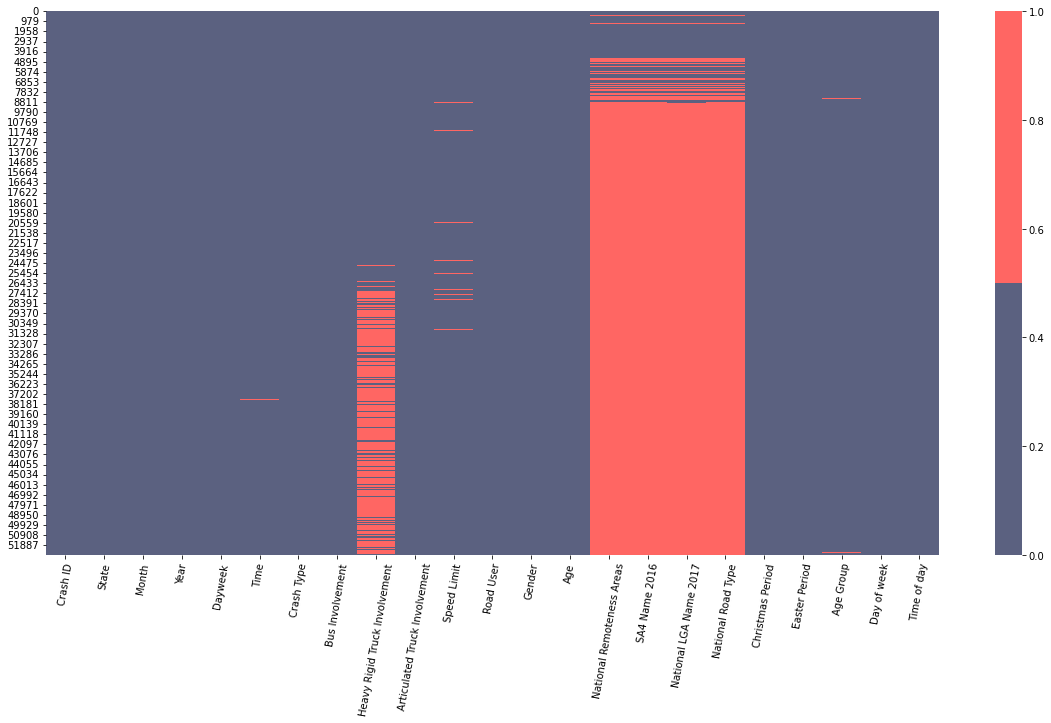

In [156]:
fig, ax = plt.subplots(figsize=(20,10))     
cols = df.columns 
colours = ['#5b6180', '#FF6663'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
ax.set_xticklabels(ax.get_xticklabels(),rotation =80)
plt.show()

In [157]:
#percentage of data missing per column

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    pprint(f"{col} - {round(pct_missing*100)}")

'Crash ID - 0'
'State - 0'
'Month - 0'
'Year - 0'
'Dayweek - 0'
'Time - 0'
'Crash Type - 0'
'Bus Involvement - 0'
'Heavy Rigid Truck Involvement - 39'
'Articulated Truck Involvement - 0'
'Speed Limit - 1'
'Road User - 0'
'Gender - 0'
'Age - 0'
'National Remoteness Areas - 87'
'SA4 Name 2016 - 87'
'National LGA Name 2017 - 87'
'National Road Type - 87'
'Christmas Period - 0'
'Easter Period - 0'
'Age Group - 0'
'Day of week - 0'
'Time of day - 0'


### Population Dataset

In [158]:
df_pop

,Unnamed: 0,Estimated Resident Population ; Male ; New South Wales ;,Estimated Resident Population ; Male ; Victoria ;,Estimated Resident Population ; Male ; Queensland ;,Estimated Resident Population ; Male ; South Australia ;,Estimated Resident Population ; Male ; Western Australia ;,Estimated Resident Population ; Male ; Tasmania ;,Estimated Resident Population ; Male ; Northern Territory ;,Estimated Resident Population ; Male ; Australian Capital Territory ;,Estimated Resident Population ; Male ; Australia ;,...,Estimated Resident Population ; Female ; Australia ;,Estimated Resident Population ; Persons ; New South Wales ;,Estimated Resident Population ; Persons ; Victoria ;,Estimated Resident Population ; Persons ; Queensland ;,Estimated Resident Population ; Persons ; South Australia ;,Estimated Resident Population ; Persons ; Western Australia ;,Estimated Resident Population ; Persons ; Tasmania ;,Estimated Resident Population ; Persons ; Northern Territory ;,Estimated Resident Population ; Persons ; Australian Capital Territory ;,Estimated Resident Population ; Persons ; Australia ;
0,Unit,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,...,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons
1,Series Type,Original,Original,Original,Original,Original,Original,Original,Original,Original,...,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original
2,Data Type,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,...,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE,STOCK_CLOSE
3,Frequency,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,...,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter,Quarter
4,Collection Month,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2020-06-01 00:00:00,4051716,3313938,2556616,873503,1328244,267230,126288,212892,12732938,...,12960329,8167024,6693858,5175245,1770277,2664212,540536,246235,431213,25693267
166,2020-09-01 00:00:00,4049429,3304692,2560204,873468,1329495,267355,126324,212696,12726185,...,12954964,8162613,6675626,5182750,1770249,2667361,540644,246457,430763,25681149
167,2020-12-01 00:00:00,4051606,3295641,2565637,873453,1330906,267514,126091,212619,12725993,...,12957695,8168294,6657917,5193404,1770467,2670646,540970,246280,431020,25683688
168,2021-03-01 00:00:00,4055333,3291551,2572425,874254,1333915,267782,126220,212956,12736964,...,12967953,8175379,6649441,5206878,1771952,2676777,541609,246580,431606,25704917


In [159]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 28 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Unnamed: 0                                                                  170 non-null    object
 1   Estimated Resident Population ;  Male ;  New South Wales ;                  170 non-null    object
 2   Estimated Resident Population ;  Male ;  Victoria ;                         170 non-null    object
 3   Estimated Resident Population ;  Male ;  Queensland ;                       170 non-null    object
 4   Estimated Resident Population ;  Male ;  South Australia ;                  170 non-null    object
 5   Estimated Resident Population ;  Male ;  Western Australia ;                170 non-null    object
 6   Estimated Resident Population ;  Male ;  Tasmania ;       

## Cleaning Data

Cleaning the data from the crash dataset:



In [160]:
df

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,NaN,No,...,5,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
52839,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,19,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52840,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52841,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day


In [161]:
#replace NaN values with ''
df.fillna('', inplace=True)

#convert time from object to datetime to time to later compare accidents by time of day
df["Time"] = df["Time"].astype('datetime64[ns]')
df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True)
df['Time'] = df['Time'].dt.time

In [162]:
#Set up quarters to match the reporting periods for the population dataset
df.loc[(df.Month >= 1) & (df.Month <= 3), 'Quarter'] = "Q1"
df.loc[(df.Month >= 4) & (df.Month <= 6), 'Quarter'] = "Q2"
df.loc[(df.Month >= 7) & (df.Month <= 9), 'Quarter'] = "Q3"
df.loc[(df.Month >= 10) & (df.Month <= 12), 'Quarter'] = "Q4"


df.loc[(df["Time"] >= time(6, 0)) & (df["Time"] < time(10,0)), "Time of day"] = "Morning Commute (6am - 10am)"
df.loc[(df["Time"] >= time(10, 0)) & (df["Time"] < time(15,0)), "Time of day"] = "Daytime (10am - 3pm)"
df.loc[(df["Time"] >= time(15, 0)) & (df["Time"] < time(19,0)), "Time of day"] = "Evening Commute (3pm - 7pm)"
df.loc[(df["Time"] >= time(19, 0)) & (df["Time"] < time(23,0)), "Time of day"] = "Late Evening (7pm - 11pm)"
df.loc[(df["Time"] >= time(23, 0)) & (df["Time"] <= time(23,59)) | 
       (df["Time"] >= time(0, 0)) & (df["Time"] < time(6,0)) |
       (df["Time"].astype(str) == "NaT"), "Time of day"] = "Night (12pm - 6am)"
# df_pop["Month"] = df_pop["Date"].astype(str).str.split("-")


df

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day,Quarter
0,20212133,Vic,9,2021,Sunday,00:30:00,Single,,,,...,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night (12pm - 6am),Q3
1,20214022,SA,9,2021,Saturday,23:31:00,Multiple,No,No,No,...,Major Cities of Australia,Adelaide - North,Playford (C),,No,No,26_to_39,Weekend,Night (12pm - 6am),Q3
2,20212096,Vic,9,2021,Saturday,23:00:00,Single,,,,...,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night (12pm - 6am),Q3
3,20212145,Vic,9,2021,Saturday,22:25:00,Single,,,,...,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Late Evening (7pm - 11pm),Q3
4,20212075,Vic,9,2021,Saturday,05:15:00,Single,,,,...,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night (12pm - 6am),Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,Wednesday,17:05:00,Single,Yes,,No,...,,,,,No,No,0_to_16,Weekday,Evening Commute (3pm - 7pm),Q1
52839,19895088,WA,1,1989,Monday,06:00:00,Single,No,,No,...,,,,,Yes,No,17_to_25,Weekday,Morning Commute (6am - 10am),Q1
52840,19895088,WA,1,1989,Monday,06:00:00,Single,No,,No,...,,,,,Yes,No,17_to_25,Weekday,Morning Commute (6am - 10am),Q1
52841,19895088,WA,1,1989,Monday,06:00:00,Single,No,,No,...,,,,,Yes,No,17_to_25,Weekday,Morning Commute (6am - 10am),Q1


Cleaning the population dataset:

In [163]:
#removing superfluous rows 
df_pop = df_pop.iloc[9:, :]
df_pop = df_pop.apply(pd.to_numeric, errors='ignore')


In [164]:
df_pop

,Unnamed: 0,Estimated Resident Population ; Male ; New South Wales ;,Estimated Resident Population ; Male ; Victoria ;,Estimated Resident Population ; Male ; Queensland ;,Estimated Resident Population ; Male ; South Australia ;,Estimated Resident Population ; Male ; Western Australia ;,Estimated Resident Population ; Male ; Tasmania ;,Estimated Resident Population ; Male ; Northern Territory ;,Estimated Resident Population ; Male ; Australian Capital Territory ;,Estimated Resident Population ; Male ; Australia ;,...,Estimated Resident Population ; Female ; Australia ;,Estimated Resident Population ; Persons ; New South Wales ;,Estimated Resident Population ; Persons ; Victoria ;,Estimated Resident Population ; Persons ; Queensland ;,Estimated Resident Population ; Persons ; South Australia ;,Estimated Resident Population ; Persons ; Western Australia ;,Estimated Resident Population ; Persons ; Tasmania ;,Estimated Resident Population ; Persons ; Northern Territory ;,Estimated Resident Population ; Persons ; Australian Capital Territory ;,Estimated Resident Population ; Persons ; Australia ;
9,1981-06-01,2608351,1958717,1178447,653940,657249,212565,65393,113605,7448267,...,7474993,5234889,3946917,2345208,1318769,1300056,427224,122616,227581,14923260
10,1981-09-01,2616060,1964139,1189946,655136,663047,212862,66716,114215,7482121,...,7506556,5249455,3957333,2367477,1321235,1311284,427925,125186,228782,14988677
11,1981-12-01,2624579,1969349,1200504,657014,667381,212935,68023,114554,7514339,...,7539778,5266894,3968398,2387943,1325176,1320221,428283,127718,229484,15054117
12,1982-03-01,2634534,1975617,1210128,658840,672273,213477,69023,115374,7549266,...,7572432,5286119,3980826,2406355,1328670,1329700,429445,129593,230990,15121698
13,1982-06-01,2643527,1981619,1219369,660066,676892,213679,69388,116374,7580914,...,7603333,5303580,3992870,2424586,1331108,1338899,429845,130314,233045,15184247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2020-06-01,4051716,3313938,2556616,873503,1328244,267230,126288,212892,12732938,...,12960329,8167024,6693858,5175245,1770277,2664212,540536,246235,431213,25693267
166,2020-09-01,4049429,3304692,2560204,873468,1329495,267355,126324,212696,12726185,...,12954964,8162613,6675626,5182750,1770249,2667361,540644,246457,430763,25681149
167,2020-12-01,4051606,3295641,2565637,873453,1330906,267514,126091,212619,12725993,...,12957695,8168294,6657917,5193404,1770467,2670646,540970,246280,431020,25683688
168,2021-03-01,4055333,3291551,2572425,874254,1333915,267782,126220,212956,12736964,...,12967953,8175379,6649441,5206878,1771952,2676777,541609,246580,431606,25704917


In [165]:

df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 9 to 169
Data columns (total 28 columns):
 #   Column                                                                      Non-Null Count  Dtype         
---  ------                                                                      --------------  -----         
 0   Unnamed: 0                                                                  161 non-null    datetime64[ns]
 1   Estimated Resident Population ;  Male ;  New South Wales ;                  161 non-null    int64         
 2   Estimated Resident Population ;  Male ;  Victoria ;                         161 non-null    int64         
 3   Estimated Resident Population ;  Male ;  Queensland ;                       161 non-null    int64         
 4   Estimated Resident Population ;  Male ;  South Australia ;                  161 non-null    int64         
 5   Estimated Resident Population ;  Male ;  Western Australia ;                161 non-null    int64         

In [166]:
df_pop.columns

Index(['Unnamed: 0',
       'Estimated Resident Population ;  Male ;  New South Wales ;',
       'Estimated Resident Population ;  Male ;  Victoria ;',
       'Estimated Resident Population ;  Male ;  Queensland ;',
       'Estimated Resident Population ;  Male ;  South Australia ;',
       'Estimated Resident Population ;  Male ;  Western Australia ;',
       'Estimated Resident Population ;  Male ;  Tasmania ;',
       'Estimated Resident Population ;  Male ;  Northern Territory ;',
       'Estimated Resident Population ;  Male ;  Australian Capital Territory ;',
       'Estimated Resident Population ;  Male ;  Australia ;',
       'Estimated Resident Population ;  Female ;  New South Wales ;',
       'Estimated Resident Population ;  Female ;  Victoria ;',
       'Estimated Resident Population ;  Female ;  Queensland ;',
       'Estimated Resident Population ;  Female ;  South Australia ;',
       'Estimated Resident Population ;  Female ;  Western Australia ;',
       'Estimated Re

In [167]:
#Make column names more meaningful and easier to read

df_pop = df_pop.rename(columns = {'Unnamed: 0': 'Date',
                                 'Estimated Resident Population ;  Male ;  New South Wales ;':  "NSW - Male", 
                                'Estimated Resident Population ;  Male ;  Victoria ;': "Vic - Male",
                                'Estimated Resident Population ;  Male ;  Queensland ;': "QLD - Male",
                                'Estimated Resident Population ;  Male ;  South Australia ;': "SA - Male",
                                'Estimated Resident Population ;  Male ;  Western Australia ;': "WA - Male",
                                'Estimated Resident Population ;  Male ;  Tasmania ;': "Tas - Male",
                                'Estimated Resident Population ;  Male ;  Northern Territory ;': "NT - Male",
                                'Estimated Resident Population ;  Male ;  Australian Capital Territory ;': "ACT - Male",
                                'Estimated Resident Population ;  Male ;  Australia ;': "AUS - Male",
                                'Estimated Resident Population ;  Female ;  New South Wales ;':  "NSW - Female",
                                'Estimated Resident Population ;  Female ;  Victoria ;': "Vic - Female",
                                'Estimated Resident Population ;  Female ;  Queensland ;': "QLD - Female",
                                'Estimated Resident Population ;  Female ;  South Australia ;': "SA - Female",
                                'Estimated Resident Population ;  Female ;  Western Australia ;': "WA - Female",
                                'Estimated Resident Population ;  Female ;  Tasmania ;': "Tas - Female",
                                'Estimated Resident Population ;  Female ;  Northern Territory ;': "NT - Female",
                                'Estimated Resident Population ;  Female ;  Australian Capital Territory ;': "ACT - Female",
                                'Estimated Resident Population ;  Female ;  Australia ;': "AUS - Female",
                                'Estimated Resident Population ;  Persons ;  New South Wales ;': "NSW - All",
                                'Estimated Resident Population ;  Persons ;  Victoria ;': "Vic - All",
                                'Estimated Resident Population ;  Persons ;  Queensland ;': "QLD - All",
                                'Estimated Resident Population ;  Persons ;  South Australia ;': "SA - All",
                                'Estimated Resident Population ;  Persons ;  Western Australia ;': "WA - All",
                                'Estimated Resident Population ;  Persons ;  Tasmania ;': "Tas - All",
                                'Estimated Resident Population ;  Persons ;  Northern Territory ;': "NT - All",
                                'Estimated Resident Population ;  Persons ;  Australian Capital Territory ;': "ACT - All",
                                'Estimated Resident Population ;  Persons ;  Australia ;': "AUS - All",
                                 
                                 })
#Parse the month and year into new columns and drop old date column
df_pop["Month"] = df_pop["Date"].astype(str).str.split("-")
df_pop['Month'] = df_pop["Date"].astype(str).str[5:7]
df_pop["Year"] = df_pop["Date"].astype(str).str[:4]
df_pop = df_pop.drop("Date",axis = 1)



In [168]:
#Return Month and Year back to int 
df_pop["Month"] = df_pop["Month"].astype(int)
df_pop["Year"] = df_pop["Year"].astype(int)

In [169]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 9 to 169
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   NSW - Male    161 non-null    int64
 1   Vic - Male    161 non-null    int64
 2   QLD - Male    161 non-null    int64
 3   SA - Male     161 non-null    int64
 4   WA - Male     161 non-null    int64
 5   Tas - Male    161 non-null    int64
 6   NT - Male     161 non-null    int64
 7   ACT - Male    161 non-null    int64
 8   AUS - Male    161 non-null    int64
 9   NSW - Female  161 non-null    int64
 10  Vic - Female  161 non-null    int64
 11  QLD - Female  161 non-null    int64
 12  SA - Female   161 non-null    int64
 13  WA - Female   161 non-null    int64
 14  Tas - Female  161 non-null    int64
 15  NT - Female   161 non-null    int64
 16  ACT - Female  161 non-null    int64
 17  AUS - Female  161 non-null    int64
 18  NSW - All     161 non-null    int64
 19  Vic - All     161 non-null   

In [170]:
#Reset the Index
df_pop.reset_index(drop = True, inplace = True)
df_pop

,NSW - Male,Vic - Male,QLD - Male,SA - Male,WA - Male,Tas - Male,NT - Male,ACT - Male,AUS - Male,NSW - Female,...,Vic - All,QLD - All,SA - All,WA - All,Tas - All,NT - All,ACT - All,AUS - All,Month,Year
0,2608351,1958717,1178447,653940,657249,212565,65393,113605,7448267,2626538,...,3946917,2345208,1318769,1300056,427224,122616,227581,14923260,6,1981
1,2616060,1964139,1189946,655136,663047,212862,66716,114215,7482121,2633395,...,3957333,2367477,1321235,1311284,427925,125186,228782,14988677,9,1981
2,2624579,1969349,1200504,657014,667381,212935,68023,114554,7514339,2642315,...,3968398,2387943,1325176,1320221,428283,127718,229484,15054117,12,1981
3,2634534,1975617,1210128,658840,672273,213477,69023,115374,7549266,2651585,...,3980826,2406355,1328670,1329700,429445,129593,230990,15121698,3,1982
4,2643527,1981619,1219369,660066,676892,213679,69388,116374,7580914,2660053,...,3992870,2424586,1331108,1338899,429845,130314,233045,15184247,6,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,4051716,3313938,2556616,873503,1328244,267230,126288,212892,12732938,4115308,...,6693858,5175245,1770277,2664212,540536,246235,431213,25693267,6,2020
157,4049429,3304692,2560204,873468,1329495,267355,126324,212696,12726185,4113184,...,6675626,5182750,1770249,2667361,540644,246457,430763,25681149,9,2020
158,4051606,3295641,2565637,873453,1330906,267514,126091,212619,12725993,4116688,...,6657917,5193404,1770467,2670646,540970,246280,431020,25683688,12,2020
159,4055333,3291551,2572425,874254,1333915,267782,126220,212956,12736964,4120046,...,6649441,5206878,1771952,2676777,541609,246580,431606,25704917,3,2021


In [171]:
#Create a column for quarter to later merge with crash data frame
df_pop.loc[(df_pop.Month >= 1) & (df_pop.Month <= 3), 'Quarter'] = "Q1"
df_pop.loc[(df_pop.Month >= 4) & (df_pop.Month <= 6), 'Quarter'] = "Q2"
df_pop.loc[(df_pop.Month >= 7) & (df_pop.Month <= 9), 'Quarter'] = "Q3"
df_pop.loc[(df_pop.Month >= 10) & (df_pop.Month <= 12), 'Quarter'] = "Q4"

In [172]:
df_pop

,NSW - Male,Vic - Male,QLD - Male,SA - Male,WA - Male,Tas - Male,NT - Male,ACT - Male,AUS - Male,NSW - Female,...,QLD - All,SA - All,WA - All,Tas - All,NT - All,ACT - All,AUS - All,Month,Year,Quarter
0,2608351,1958717,1178447,653940,657249,212565,65393,113605,7448267,2626538,...,2345208,1318769,1300056,427224,122616,227581,14923260,6,1981,Q2
1,2616060,1964139,1189946,655136,663047,212862,66716,114215,7482121,2633395,...,2367477,1321235,1311284,427925,125186,228782,14988677,9,1981,Q3
2,2624579,1969349,1200504,657014,667381,212935,68023,114554,7514339,2642315,...,2387943,1325176,1320221,428283,127718,229484,15054117,12,1981,Q4
3,2634534,1975617,1210128,658840,672273,213477,69023,115374,7549266,2651585,...,2406355,1328670,1329700,429445,129593,230990,15121698,3,1982,Q1
4,2643527,1981619,1219369,660066,676892,213679,69388,116374,7580914,2660053,...,2424586,1331108,1338899,429845,130314,233045,15184247,6,1982,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,4051716,3313938,2556616,873503,1328244,267230,126288,212892,12732938,4115308,...,5175245,1770277,2664212,540536,246235,431213,25693267,6,2020,Q2
157,4049429,3304692,2560204,873468,1329495,267355,126324,212696,12726185,4113184,...,5182750,1770249,2667361,540644,246457,430763,25681149,9,2020,Q3
158,4051606,3295641,2565637,873453,1330906,267514,126091,212619,12725993,4116688,...,5193404,1770467,2670646,540970,246280,431020,25683688,12,2020,Q4
159,4055333,3291551,2572425,874254,1333915,267782,126220,212956,12736964,4120046,...,5206878,1771952,2676777,541609,246580,431606,25704917,3,2021,Q1


In [173]:
#Create new dataframes for each state, add a new column with the state, 
#then reset the column names so they are the same for consolidating into a new dataframe 

nsw = df_pop[["Quarter", "Month", "Year", "NSW - Male", "NSW - Female", "NSW - All"]]
nsw.insert(0, 'State', 'NSW')
nsw.columns = [x.replace("NSW - ", "") for x in nsw.columns]

tas = df_pop[["Quarter", "Month", "Year", "Tas - Male", "Tas - Female", "Tas - All"]]
tas.insert(0, 'State', 'Tas')
tas.columns = [x.replace("Tas - ", "") for x in tas.columns]

vic = df_pop[["Quarter", "Month", "Year", "Vic - Male", "Vic - Female", "Vic - All"]]
vic.insert(0, 'State', 'Vic')
vic.columns = [x.replace("Vic - ", "") for x in vic.columns]

qld = df_pop[["Quarter", "Month", "Year", "QLD - Male", "QLD - Female", "QLD - All"]]
qld.insert(0, 'State', 'Qld')
qld.columns = [x.replace("QLD - ", "") for x in qld.columns]

sa = df_pop[["Quarter", "Month", "Year", "SA - Male", "SA - Female", "SA - All"]]
sa.insert(0, 'State', 'SA')
sa.columns = [x.replace("SA - ", "") for x in sa.columns]

wa = df_pop[["Quarter", "Month", "Year", "WA - Male", "WA - Female", "WA - All"]]
wa.insert(0, 'State', 'WA')
wa.columns = [x.replace("WA - ", "") for x in wa.columns]

nt = df_pop[["Quarter", "Month", "Year", "NT - Male", "NT - Female", "NT - All"]]
nt.insert(0, 'State', 'NT')
nt.columns = [x.replace("NT - ", "") for x in nt.columns]

act = df_pop[["Quarter", "Month", "Year", "ACT - Male", "ACT - Female", "ACT - All"]]
act.insert(0, 'State', 'ACT')
act.columns = [x.replace("ACT - ", "") for x in act.columns]

In [174]:
#Consolidating state dfs into one population df
state_pop = tas.append([vic, nsw, nt, act, wa, qld, sa])


In [175]:
state_pop
state_pop["State"].value_counts()

Tas    161
Vic    161
NSW    161
NT     161
ACT    161
WA     161
Qld    161
SA     161
Name: State, dtype: int64

In [176]:
#merging crash dataframe with population dataframe and renaming month column to a meaningful name 
#Joining inner so population data since 7 2021 is dropped as thre is no corresponding crash data for that period.

main_df = pd.merge(df, state_pop,  how='inner', on=['State', 'Year', 'Quarter'])
main_df = main_df.rename(columns={"Month_x": "Crash Month",
                                  "Month_y": "Population Month"
                                 })

main_df



,Crash ID,State,Crash Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Christmas Period,Easter Period,Age Group,Day of week,Time of day,Quarter,Population Month,Male,Female,All
0,20212045,Vic,6,2021,Monday,05:40:00,Single,No,No,No,...,No,No,26_to_39,Weekend,Night (12pm - 6am),Q2,6,3291572,3357587,6649159
1,20212082,Vic,6,2021,Sunday,14:00:00,Single,No,No,No,...,No,No,40_to_64,Weekend,Daytime (10am - 3pm),Q2,6,3291572,3357587,6649159
2,20212079,Vic,6,2021,Saturday,13:25:00,Single,No,No,No,...,No,No,65_to_74,Weekend,Daytime (10am - 3pm),Q2,6,3291572,3357587,6649159
3,20212111,Vic,6,2021,Thursday,16:50:00,Single,No,No,No,...,No,No,40_to_64,Weekday,Evening Commute (3pm - 7pm),Q2,6,3291572,3357587,6649159
4,20212149,Vic,6,2021,Wednesday,14:38:00,Multiple,No,No,No,...,No,No,17_to_25,Weekday,Daytime (10am - 3pm),Q2,6,3291572,3357587,6649159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52561,19897020,NT,3,1989,Saturday,02:16:00,Single,No,,No,...,No,No,17_to_25,Weekend,Night (12pm - 6am),Q1,3,84763,76287,161050
52562,19897054,NT,2,1989,Saturday,18:00:00,Single,No,,No,...,No,No,17_to_25,Weekend,Evening Commute (3pm - 7pm),Q1,3,84763,76287,161050
52563,19897054,NT,2,1989,Saturday,18:00:00,Single,No,,No,...,No,No,17_to_25,Weekend,Evening Commute (3pm - 7pm),Q1,3,84763,76287,161050
52564,19897038,NT,1,1989,Saturday,23:30:00,Single,No,,Yes,...,No,No,26_to_39,Weekend,Night (12pm - 6am),Q1,3,84763,76287,161050


In [177]:
#reset index
main_df.reset_index(drop = True, inplace = True)

In [184]:
main_df.columns

Index(['Crash ID', 'State', 'Crash Month', 'Year', 'Dayweek', 'Time',
       'Crash Type', 'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender',
       'Age', 'National Remoteness Areas', 'SA4 Name 2016',
       'National LGA Name 2017', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Age Group', 'Day of week', 'Time of day', 'Quarter',
       'Population Month', 'Male', 'Female', 'All'],
      dtype='object')

In [217]:
main_df["Road User"].unique()

array(['Driver', 'Motorcycle pillion passenger', 'Passenger',
       'Motorcycle rider', 'Pedestrian', 'Pedal cyclist', 'Other/-9'],
      dtype=object)

In [179]:
# creating CSV for team members
main_df.to_csv('./Resources/clean_crash_population.csv', index=False)

## Summary Stats

In [248]:
#Set total number of fatalities
total_fatalities = "{:,}".format(len(main_df))

#Set the total number of accidents
individual_accidents = "{:,}".format(len(main_df["Crash ID"].unique()))

sex = (((main_df.Gender) == "Female").value_counts([0])*100).tolist()
female = round(sex[1])
male = round(sex[0])

road_user = ((main_df["Road User"]).value_counts())
driver = round(road_user[0].astype('float')/len(main_df) * 100, 2)
passenger = round(road_user[1].astype('float')/len(main_df) * 100, 2)
pedestrian = round(road_user[2].astype('float')/len(main_df) * 100, 2)
motorcycle_rider = round(road_user[3].astype('float')/len(main_df) * 100, 2)
pedal_cyclis = round(road_user[4].astype('float')/len(main_df) * 100, 2)
motorcylce_passenger = round(road_user[5].astype('float')/len(main_df) * 100, 2)


# women_pct = women/total_fatalities


summary_df = pd.DataFrame([[individual_accidents, total_fatalities, female, male]], 
                         columns=['Number of Accidents', 'Total Fatalities', '% Female', '% Male' ])

summary_df


,Number of Accidents,Total Fatalities,% Female,% Male
0,"46,786","52,000",28,72


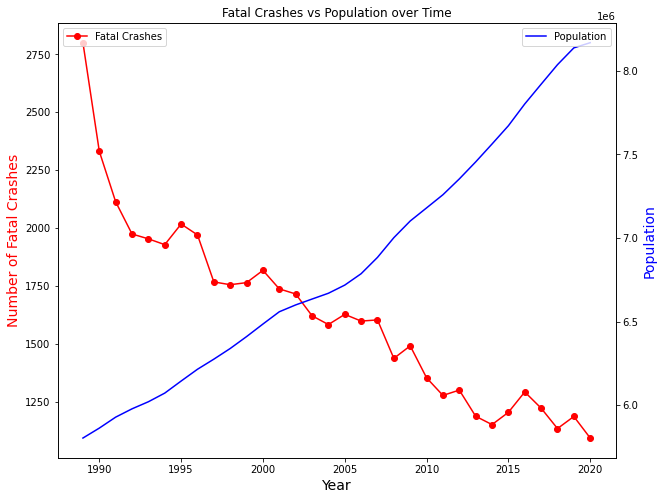

In [180]:


main_df = main_df.loc[main_df.Year != 2021]
year_group = main_df.groupby(main_df['Year'])

crash_by_year = year_group["Crash ID"].count()
pop_by_year = year_group["All"].max()

x_axis = year_df["Year"].unique()
x_axis = np.sort(x_axis)

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (10, 8))

# make a plot for fatal crashes and set title
ax.set_title("Fatal Crashes vs Population over Time")
ax.plot(x_axis, crash_by_year, color="red", marker="o")

# set x-axis label
ax.set_xlabel("Year", fontsize=14)

# set y-axis label
ax.set_ylabel("Number of Fatal Crashes", color="red", fontsize=14)

# crash_by_year
ax.legend(["Fatal Crashes"], loc="upper left")

# twin object for two different y-axis on the sample plot
ax2= ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(x_axis, pop_by_year, color="blue")
ax2.set_ylabel("Population", color="blue",fontsize=14)
ax2.legend(["Population"], loc="upper right")
plt.show()

fig.savefig('fatal_crashes_vs_population.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [181]:
month_group = main_df.groupby(main_df["Crash Month"])
crash_by_month = month_group["Crash ID"].count()

- contrasting the holiday period with regular days
- line chart for month
----
months/days --> calc mean per day per month which is part of the ttest calc anyway. 
run ttest comparing december to the other months 
that will give a pvalue is greater than .05 there is no significant difference between december and the other months. 
-- add states for each 


In [ ]:
crash_by_month.plot.bar();

In [ ]:
day_of_week_group = main_df.groupby(main_df["Dayweek"])
crash_by_dow = day_of_week_group["Crash ID"].count()

In [ ]:
crash_by_dow.plot.bar();

In [ ]:
time_of_day_group = main_df.groupby(main_df["Time of day"])

crash_by_tod = time_of_day_group["Crash ID"].count()

In [ ]:
crash_by_tod.plot.bar();

In [ ]:
quarter_group = main_df.groupby(main_df["Quarter"])
crash_by_quarter = quarter_group["Crash ID"].count()

In [ ]:
crash_by_quarter.plot.bar();


In [ ]:
state_group = main_df.groupby(main_df["State"])
crash_by_state = state_group["Crash ID"].count()


In [ ]:
main_df